In [1]:
# !/usr/env python3

'''
Output:
video captioning model itself and produce loss curve

Usage:
main document to train the video captioning model
'''

# set up
from __future__ import print_function
import tensorflow as tf
import pickle
import os
import numpy as np
import logging
import matplotlib.pyplot as plt
from util import *
from model.video_caption import sequence_2_sequence_LSTM

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
# define parameters

logging.basicConfig(level=logging.INFO)
#=======Change These===============================
tf.app.flags.DEFINE_string("model_name", "baseline_1", "name of the model")
tf.app.flags.DEFINE_integer("state_size", 100, "Size of each model layer.")
tf.app.flags.DEFINE_float("learning_rate", 1e-4, "Base Learning rate.")
#==================================================

tf.app.flags.DEFINE_float("input_size", 7*7*512, "input size for each frame")
tf.app.flags.DEFINE_integer("batch_size", 5, "how many videos put per run")
tf.app.flags.DEFINE_integer("max_sentence_length", 20, "maximum captioning sentence length")
tf.app.flags.DEFINE_integer("word_vector_size", 50, "word embedding dimension default is 25 for twitter glove")
tf.app.flags.DEFINE_integer("voc_size", 22719, "vocabulary size")
tf.app.flags.DEFINE_integer("n_epochs", 200, "number of epoch to run")
tf.app.flags.DEFINE_integer("num_frames", 15, "number of frames per video")
tf.app.flags.DEFINE_integer("hidden_size", 100, "output size of LSTM encoder and decoder")
FLAGS = tf.app.flags.FLAGS        

In [2]:
def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

curPath = os.getcwd()
dataPath = curPath + "/datasets/"

# only pick first 100 for debugging purpose
# load data
sample_size = 100
wvector_dim = 50
is_training = True
input_frames_train, captions_train, \
        word_dict, word2Index, index2Word = load_caption_data(sample_size, dataPath, train = is_training)
word_embedding = word_embedding_array(word_dict, wvector_dim, word2Index) 
print('Finish load training data!')

Finish load training data!


In [5]:
# build model graph
tf.reset_default_graph()
model = sequence_2_sequence_LSTM(word_embedding, FLAGS)
model.build()

start building model ...
total number of parameter 12430619


In [5]:
# check variables
for v in tf.trainable_variables():
    print(v)

<tf.Variable 'LSTM_seq2seq/encoder/basic_lstm_cell/weights:0' shape=(25188, 400) dtype=float32_ref>
<tf.Variable 'LSTM_seq2seq/encoder/basic_lstm_cell/biases:0' shape=(400,) dtype=float32_ref>
<tf.Variable 'LSTM_seq2seq/decoder/basic_lstm_cell/weights:0' shape=(150, 400) dtype=float32_ref>
<tf.Variable 'LSTM_seq2seq/decoder/basic_lstm_cell/biases:0' shape=(400,) dtype=float32_ref>
<tf.Variable 'LSTM_seq2seq/decoder/hidden_to_scores/kernel:0' shape=(100, 22719) dtype=float32_ref>
<tf.Variable 'LSTM_seq2seq/decoder/hidden_to_scores/bias:0' shape=(22719,) dtype=float32_ref>


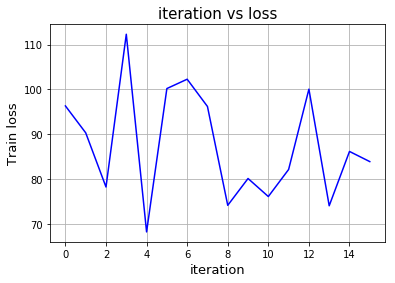

  1/200 [..............................] - ETA: 1167s - train loss: 87.5251 - dev loss: 97.5322

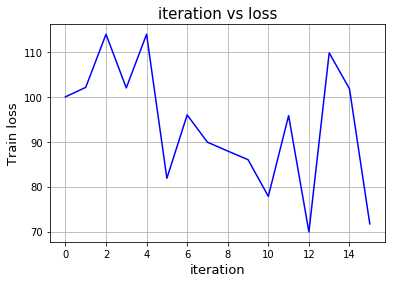

  2/200 [..............................] - ETA: 1107s - train loss: 93.7932 - dev loss: 108.7457

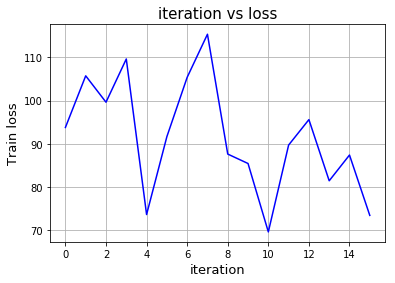

  3/200 [..............................] - ETA: 1082s - train loss: 91.5405 - dev loss: 97.7612 

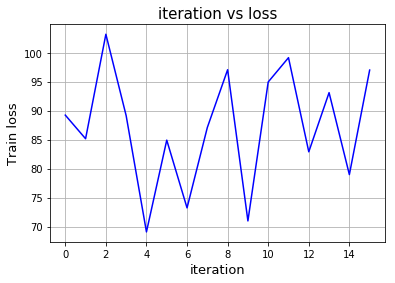

  4/200 [..............................] - ETA: 1068s - train loss: 87.1944 - dev loss: 95.7166

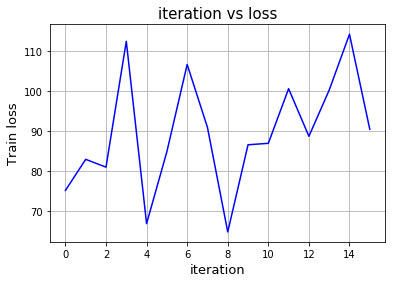

  5/200 [..............................] - ETA: 1058s - train loss: 89.5336 - dev loss: 114.0543

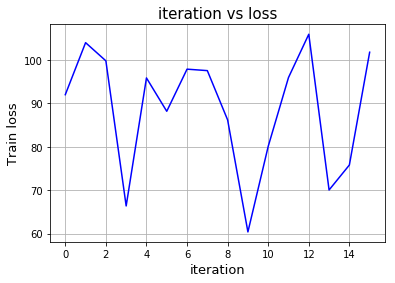

  6/200 [..............................] - ETA: 1049s - train loss: 88.6003 - dev loss: 108.1235

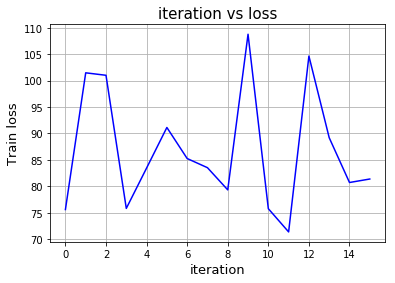

  7/200 [>.............................] - ETA: 1041s - train loss: 86.7748 - dev loss: 91.6576 

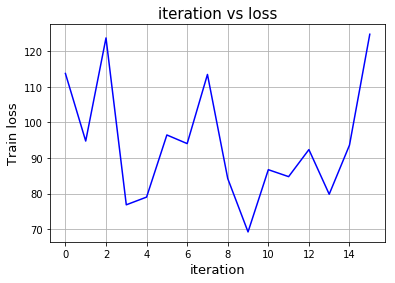

  8/200 [>.............................] - ETA: 1034s - train loss: 94.2119 - dev loss: 98.2158

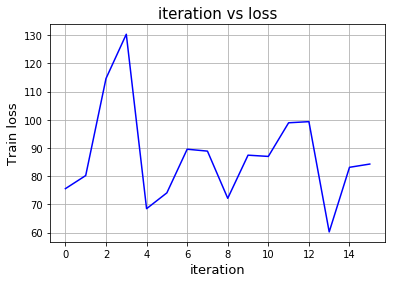

  9/200 [>.............................] - ETA: 1027s - train loss: 87.1596 - dev loss: 91.6591

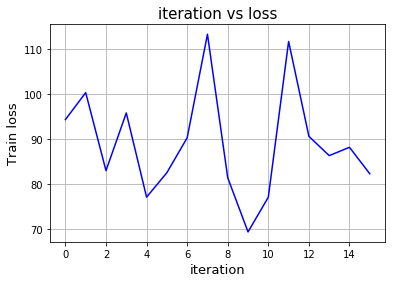

 10/200 [>.............................] - ETA: 1021s - train loss: 88.9234 - dev loss: 85.9703

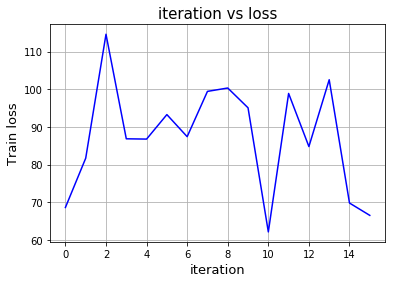

 11/200 [>.............................] - ETA: 1014s - train loss: 87.4151 - dev loss: 92.4741

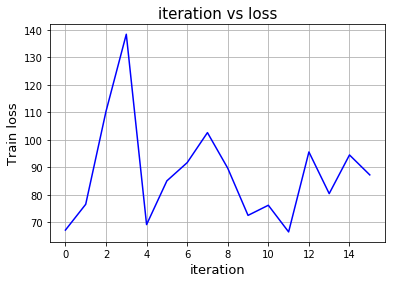

 12/200 [>.............................] - ETA: 1035s - train loss: 87.7846 - dev loss: 90.4931

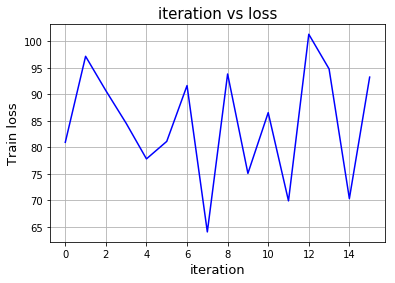

 13/200 [>.............................] - ETA: 1027s - train loss: 84.5832 - dev loss: 89.8653

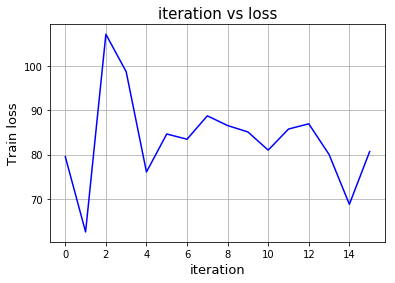

 14/200 [=>............................] - ETA: 1019s - train loss: 83.4841 - dev loss: 87.4602

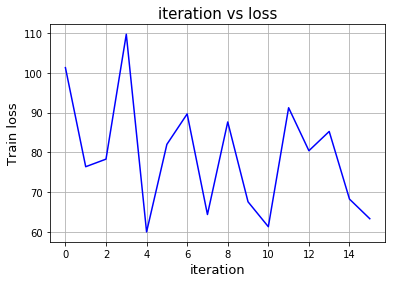

 15/200 [=>............................] - ETA: 1012s - train loss: 79.1809 - dev loss: 79.0016

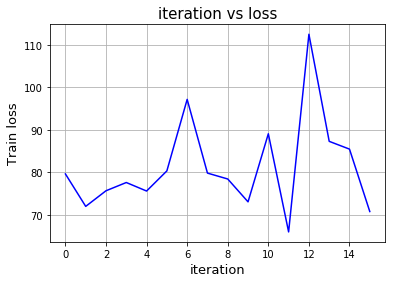

 16/200 [=>............................] - ETA: 1005s - train loss: 81.2749 - dev loss: 86.7626

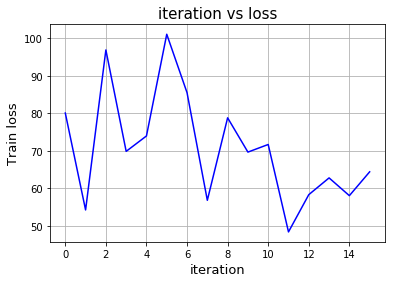

 17/200 [=>............................] - ETA: 998s - train loss: 70.6642 - dev loss: 90.4442 

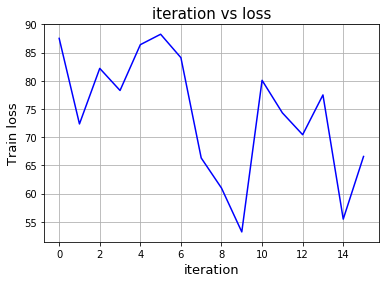

 18/200 [=>............................] - ETA: 991s - train loss: 73.9924 - dev loss: 78.2836

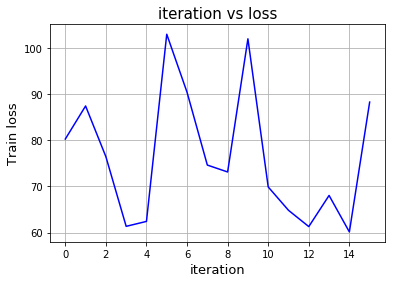

 19/200 [=>............................] - ETA: 984s - train loss: 76.4632 - dev loss: 78.1959

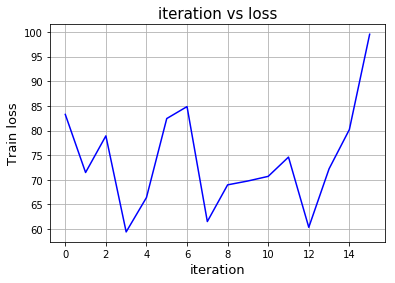

 20/200 [==>...........................] - ETA: 978s - train loss: 74.0381 - dev loss: 74.2419

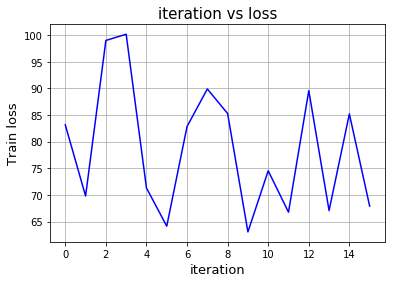

 21/200 [==>...........................] - ETA: 971s - train loss: 78.7283 - dev loss: 70.5681

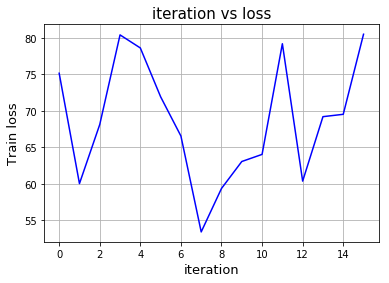

 22/200 [==>...........................] - ETA: 965s - train loss: 68.7074 - dev loss: 71.3557

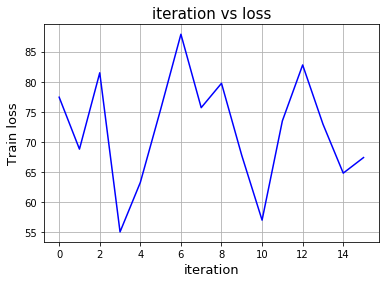

 23/200 [==>...........................] - ETA: 959s - train loss: 71.9259 - dev loss: 87.3766

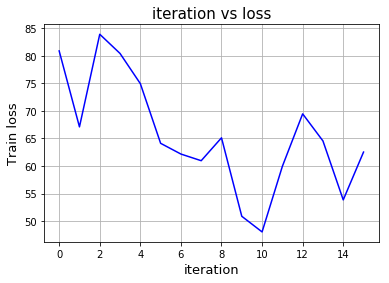

 24/200 [==>...........................] - ETA: 953s - train loss: 65.5555 - dev loss: 67.9548

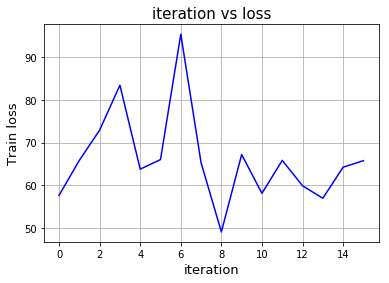

 25/200 [==>...........................] - ETA: 947s - train loss: 66.0781 - dev loss: 68.9182

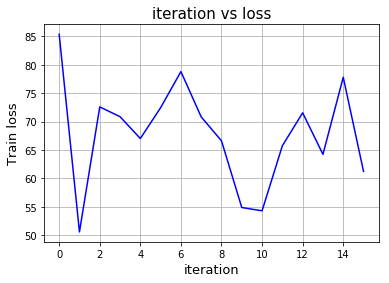

 26/200 [==>...........................] - ETA: 941s - train loss: 67.8001 - dev loss: 67.9206

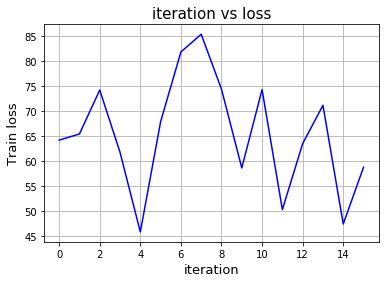

 27/200 [===>..........................] - ETA: 935s - train loss: 65.3336 - dev loss: 66.7646

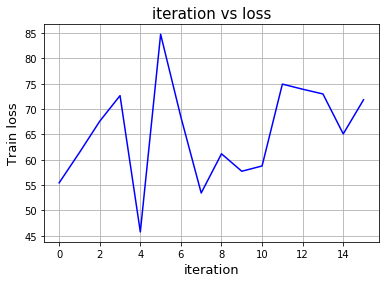

 28/200 [===>..........................] - ETA: 929s - train loss: 65.3727 - dev loss: 73.8036

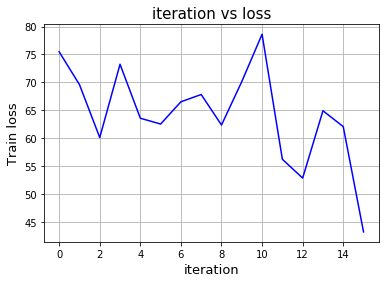

 29/200 [===>..........................] - ETA: 923s - train loss: 64.3375 - dev loss: 70.8271

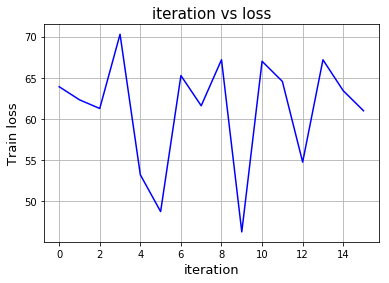

 30/200 [===>..........................] - ETA: 917s - train loss: 61.1157 - dev loss: 59.3068

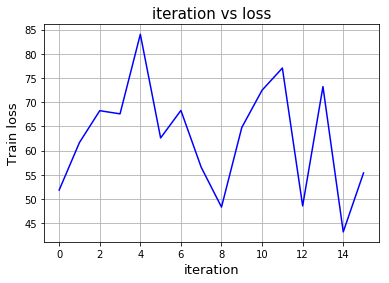

 31/200 [===>..........................] - ETA: 911s - train loss: 62.7443 - dev loss: 67.5290

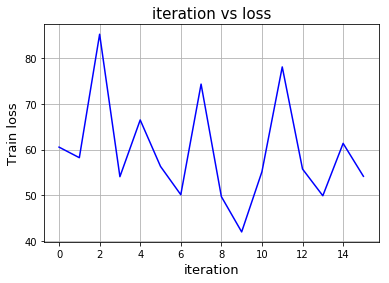

 32/200 [===>..........................] - ETA: 906s - train loss: 59.4650 - dev loss: 61.3124

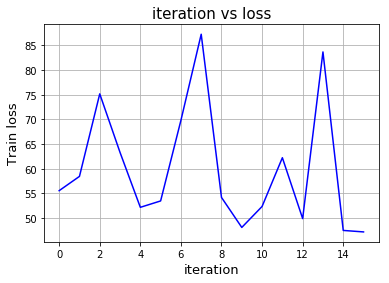

 33/200 [===>..........................] - ETA: 908s - train loss: 60.0073 - dev loss: 66.0736

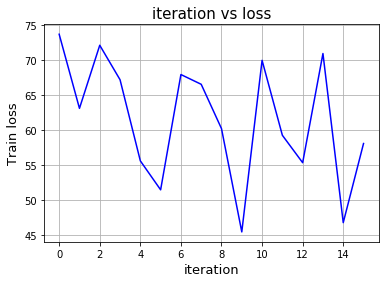

 34/200 [====>.........................] - ETA: 902s - train loss: 61.4712 - dev loss: 61.2893

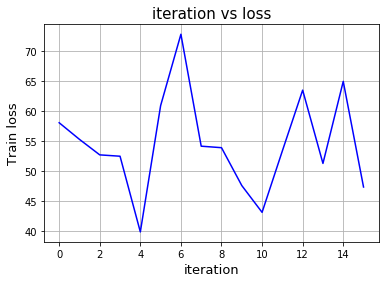

 35/200 [====>.........................] - ETA: 896s - train loss: 54.4706 - dev loss: 65.3204

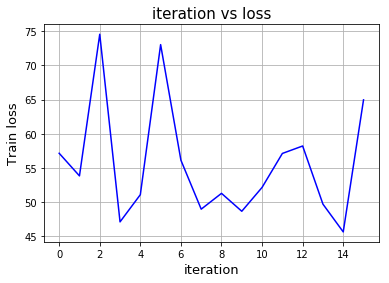

 36/200 [====>.........................] - ETA: 891s - train loss: 55.6081 - dev loss: 63.9860

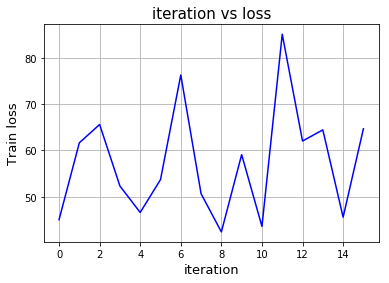

 37/200 [====>.........................] - ETA: 885s - train loss: 57.4193 - dev loss: 63.8250

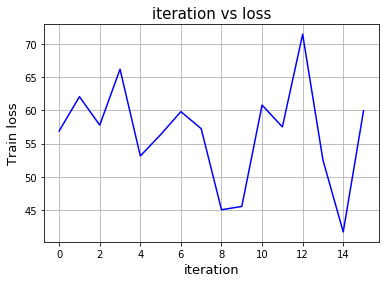

 38/200 [====>.........................] - ETA: 879s - train loss: 56.4901 - dev loss: 57.2661

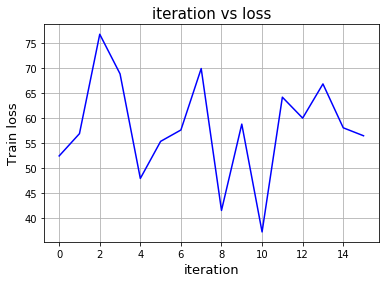

 39/200 [====>.........................] - ETA: 873s - train loss: 58.0031 - dev loss: 66.3922

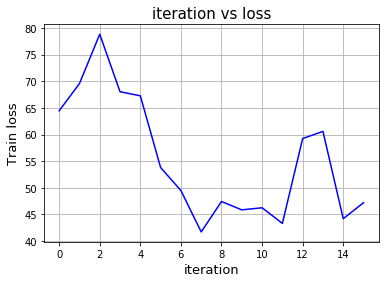

 40/200 [=====>........................] - ETA: 867s - train loss: 55.4531 - dev loss: 60.7384

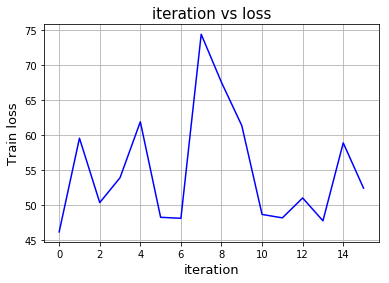

 41/200 [=====>........................] - ETA: 861s - train loss: 54.9513 - dev loss: 67.4128

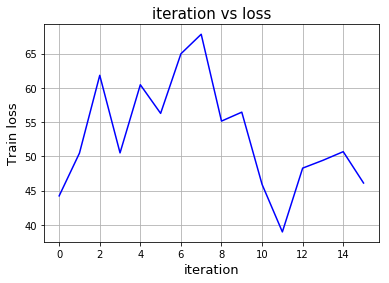

 42/200 [=====>........................] - ETA: 856s - train loss: 52.9729 - dev loss: 56.4627

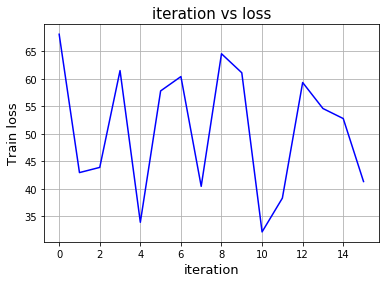

 43/200 [=====>........................] - ETA: 850s - train loss: 50.8092 - dev loss: 55.4963

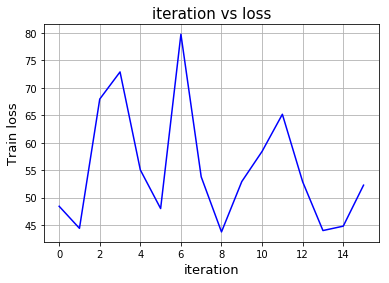

 44/200 [=====>........................] - ETA: 844s - train loss: 55.2725 - dev loss: 59.1980

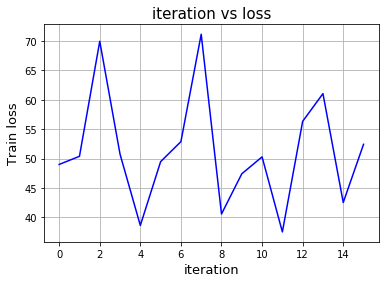

 45/200 [=====>........................] - ETA: 838s - train loss: 51.2610 - dev loss: 57.9876

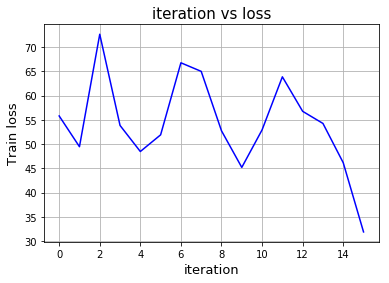

 46/200 [=====>........................] - ETA: 833s - train loss: 54.2223 - dev loss: 54.9561

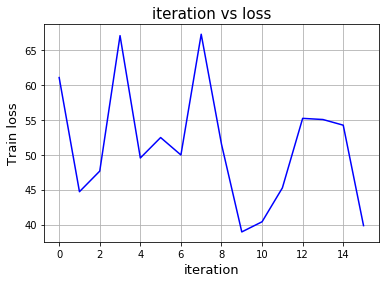

 47/200 [======>.......................] - ETA: 827s - train loss: 51.2541 - dev loss: 58.1952

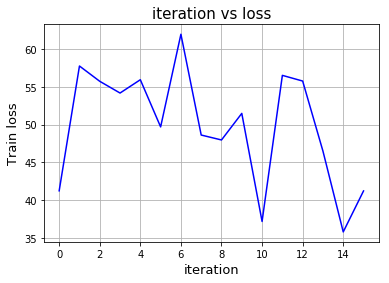

 48/200 [======>.......................] - ETA: 821s - train loss: 49.8338 - dev loss: 56.4919

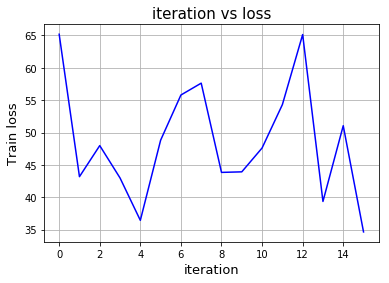

 49/200 [======>.......................] - ETA: 816s - train loss: 48.6131 - dev loss: 54.8884

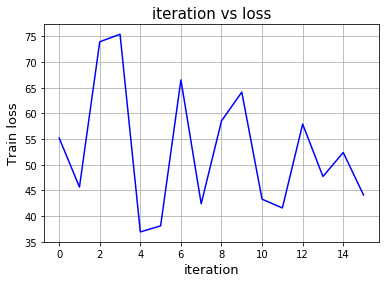

 50/200 [======>.......................] - ETA: 810s - train loss: 52.7365 - dev loss: 62.4771

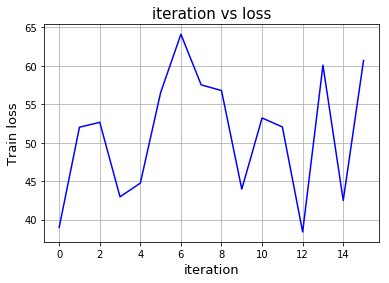

 51/200 [======>.......................] - ETA: 804s - train loss: 51.0717 - dev loss: 55.7500

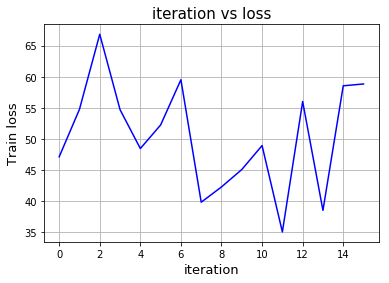

 52/200 [======>.......................] - ETA: 799s - train loss: 50.4137 - dev loss: 57.2556

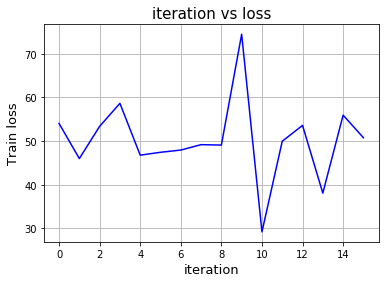

 53/200 [======>.......................] - ETA: 793s - train loss: 50.2935 - dev loss: 56.7766

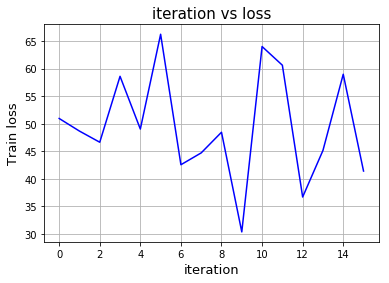

 54/200 [=======>......................] - ETA: 792s - train loss: 49.5628 - dev loss: 56.1675

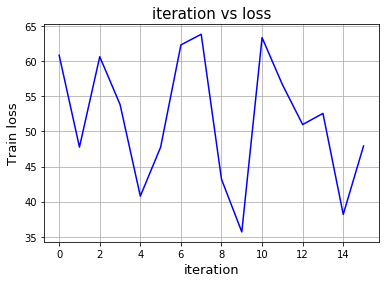

 55/200 [=======>......................] - ETA: 787s - train loss: 51.6447 - dev loss: 54.6076

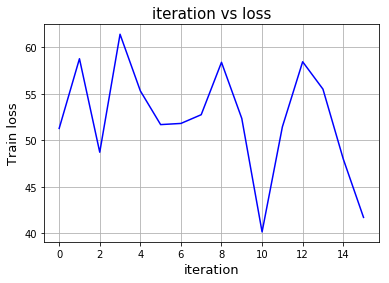

 56/200 [=======>......................] - ETA: 781s - train loss: 52.3677 - dev loss: 51.0176

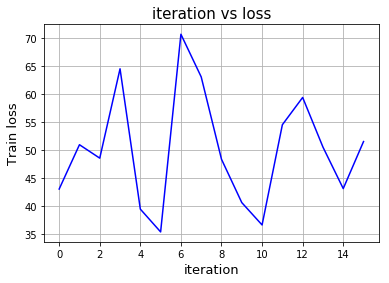

 57/200 [=======>......................] - ETA: 775s - train loss: 50.0444 - dev loss: 51.0267

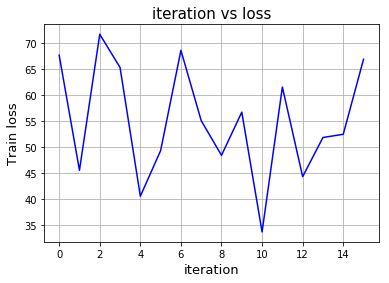

 58/200 [=======>......................] - ETA: 770s - train loss: 54.9231 - dev loss: 52.4882

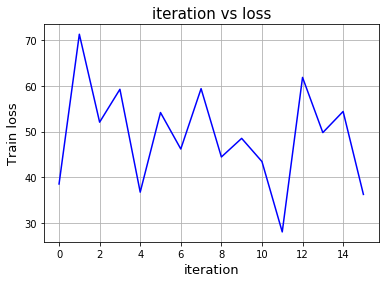

 59/200 [=======>......................] - ETA: 764s - train loss: 49.0335 - dev loss: 44.7067

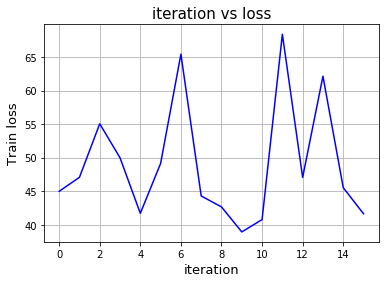

 60/200 [========>.....................] - ETA: 758s - train loss: 49.0441 - dev loss: 53.1454

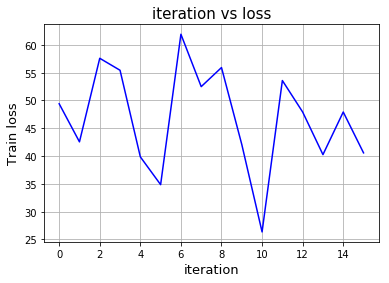

 61/200 [========>.....................] - ETA: 753s - train loss: 46.8018 - dev loss: 52.1954

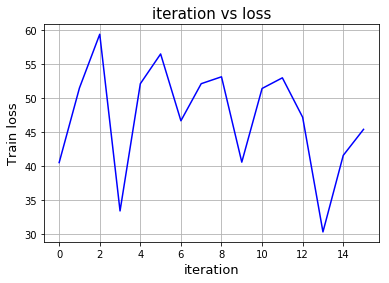

 62/200 [========>.....................] - ETA: 747s - train loss: 47.1830 - dev loss: 50.5570

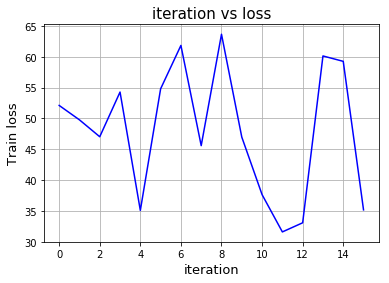

 63/200 [========>.....................] - ETA: 741s - train loss: 47.9863 - dev loss: 48.3420

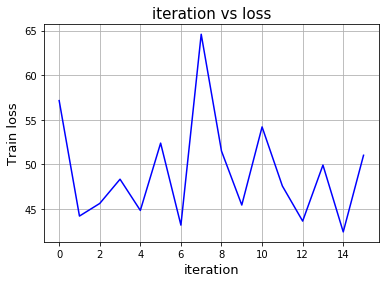

 64/200 [========>.....................] - ETA: 736s - train loss: 49.1289 - dev loss: 50.5611

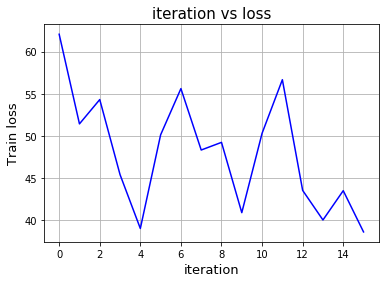

 65/200 [========>.....................] - ETA: 730s - train loss: 48.0516 - dev loss: 54.3781

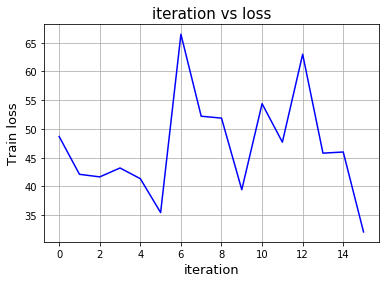

 66/200 [========>.....................] - ETA: 725s - train loss: 46.9603 - dev loss: 49.8863

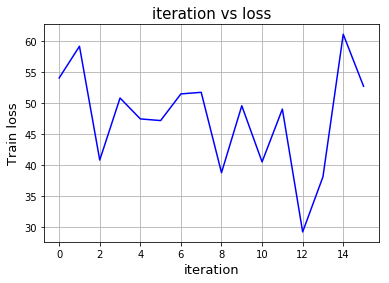

 67/200 [=========>....................] - ETA: 719s - train loss: 47.5861 - dev loss: 56.3178

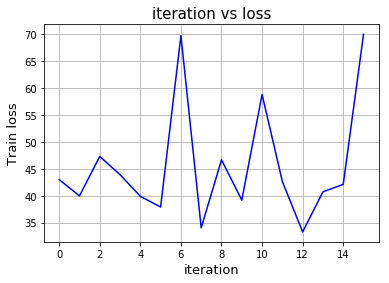

 68/200 [=========>....................] - ETA: 714s - train loss: 45.5546 - dev loss: 53.6229

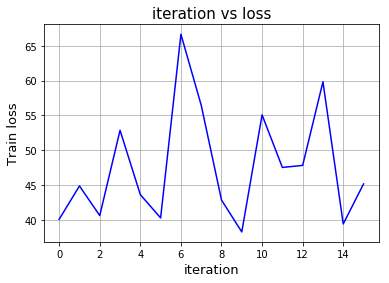

 69/200 [=========>....................] - ETA: 708s - train loss: 47.5841 - dev loss: 51.3324

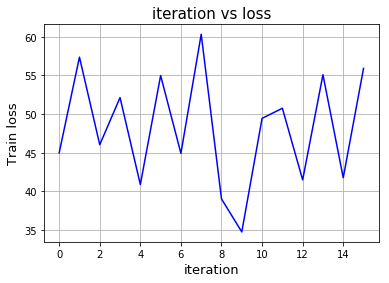

 70/200 [=========>....................] - ETA: 702s - train loss: 48.1237 - dev loss: 48.5515

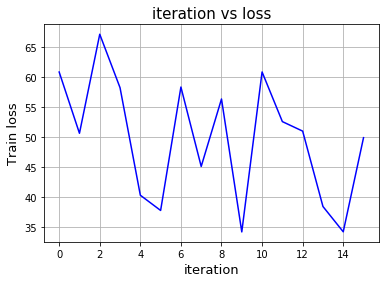

 71/200 [=========>....................] - ETA: 697s - train loss: 49.6937 - dev loss: 51.3007

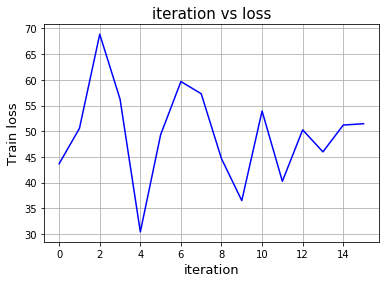

 72/200 [=========>....................] - ETA: 691s - train loss: 49.3959 - dev loss: 51.9259

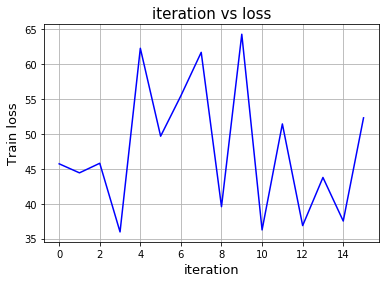

 73/200 [=========>....................] - ETA: 686s - train loss: 47.6814 - dev loss: 48.7772

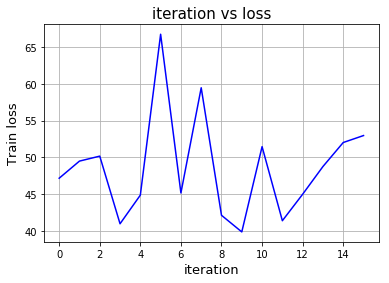

 74/200 [==========>...................] - ETA: 680s - train loss: 48.5864 - dev loss: 50.4778

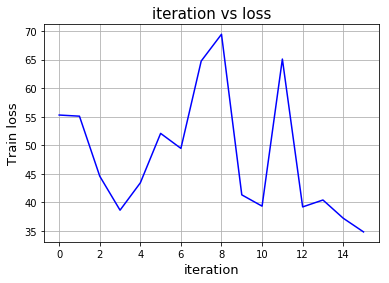

 75/200 [==========>...................] - ETA: 678s - train loss: 48.1444 - dev loss: 44.9179

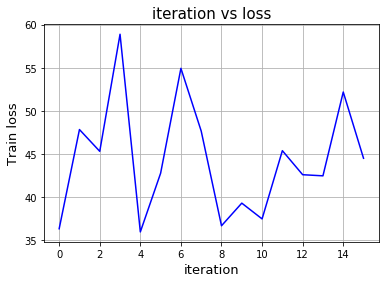

 76/200 [==========>...................] - ETA: 672s - train loss: 44.3769 - dev loss: 53.6898

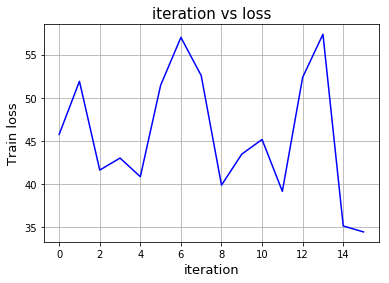

 77/200 [==========>...................] - ETA: 666s - train loss: 45.6902 - dev loss: 52.2255

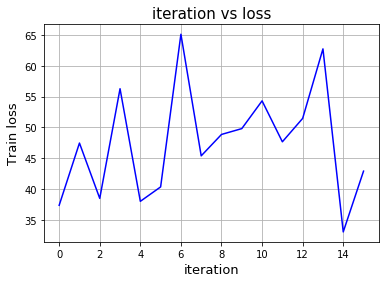

 78/200 [==========>...................] - ETA: 661s - train loss: 47.4671 - dev loss: 51.9383

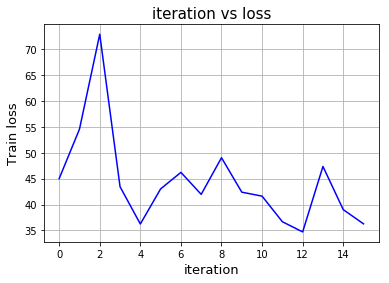

 79/200 [==========>...................] - ETA: 655s - train loss: 44.3992 - dev loss: 55.4424

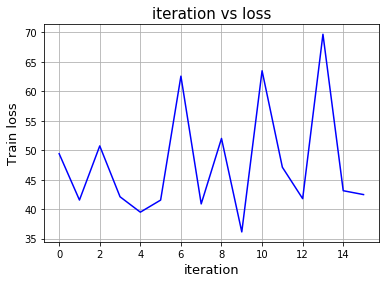

 80/200 [===========>..................] - ETA: 650s - train loss: 47.7521 - dev loss: 51.0043

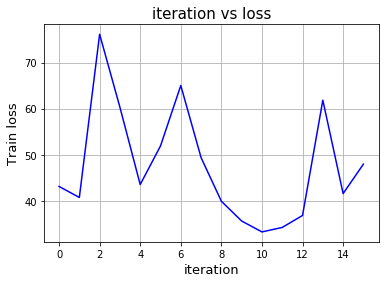

 81/200 [===========>..................] - ETA: 644s - train loss: 47.5762 - dev loss: 49.1530

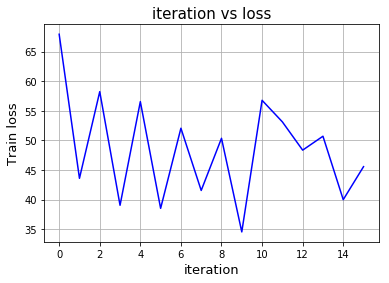

 82/200 [===========>..................] - ETA: 639s - train loss: 48.5503 - dev loss: 48.2357

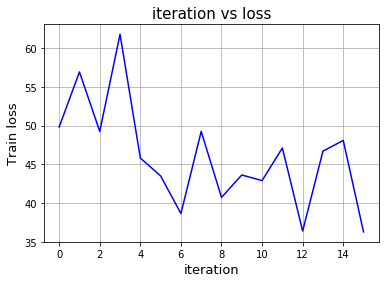

 83/200 [===========>..................] - ETA: 633s - train loss: 46.0622 - dev loss: 51.4004

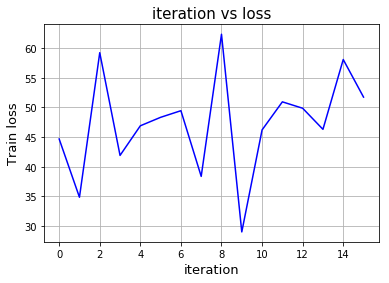

 84/200 [===========>..................] - ETA: 628s - train loss: 47.3833 - dev loss: 49.9215

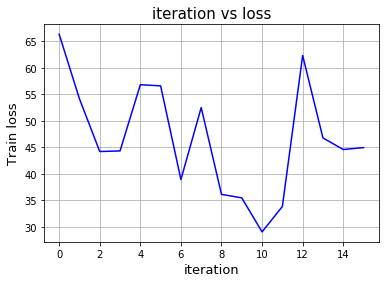

 85/200 [===========>..................] - ETA: 622s - train loss: 46.6653 - dev loss: 48.4544

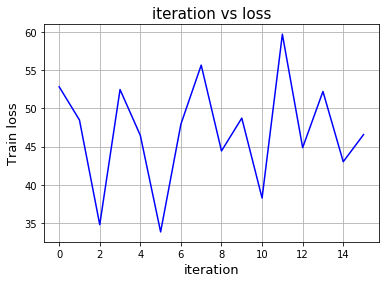

 86/200 [===========>..................] - ETA: 616s - train loss: 46.8867 - dev loss: 49.6376

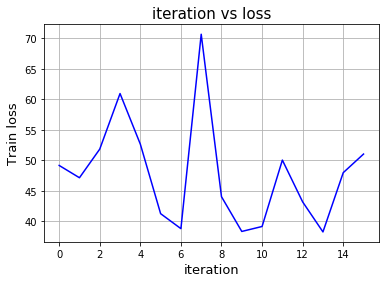

 87/200 [============>.................] - ETA: 611s - train loss: 47.7906 - dev loss: 57.3760

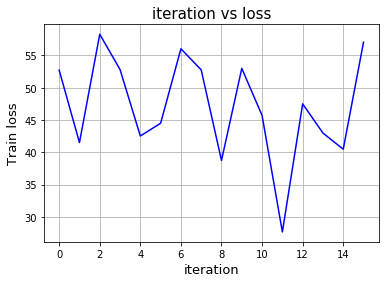

 88/200 [============>.................] - ETA: 605s - train loss: 47.1333 - dev loss: 54.1694

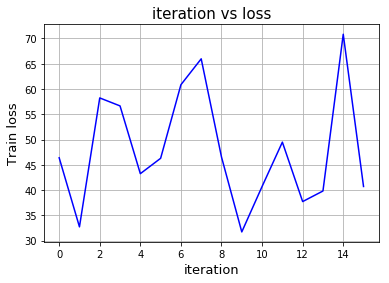

 89/200 [============>.................] - ETA: 600s - train loss: 47.9889 - dev loss: 49.5526

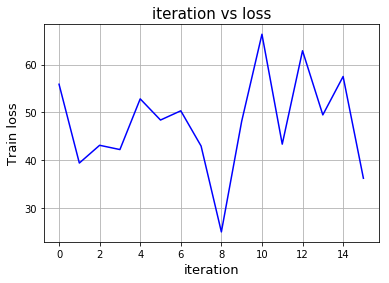

 90/200 [============>.................] - ETA: 594s - train loss: 47.7377 - dev loss: 54.5319

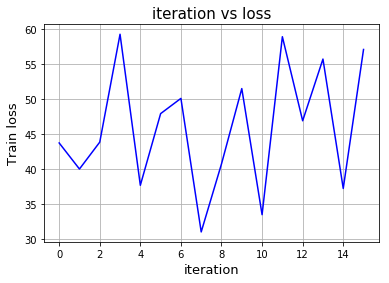

 91/200 [============>.................] - ETA: 589s - train loss: 45.9672 - dev loss: 50.5757

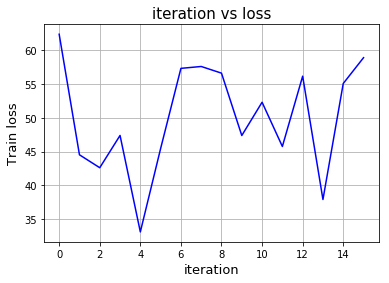

 92/200 [============>.................] - ETA: 583s - train loss: 50.0389 - dev loss: 49.5237

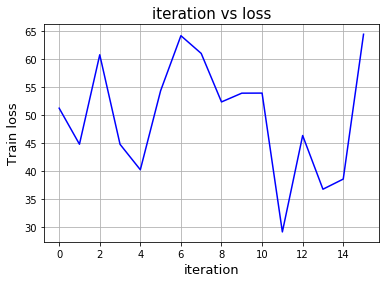

 93/200 [============>.................] - ETA: 578s - train loss: 49.7617 - dev loss: 45.1223

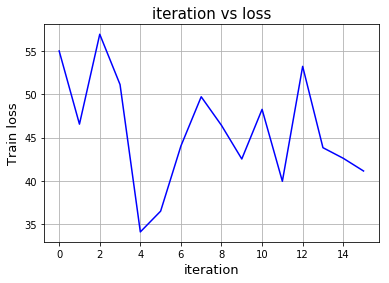

 94/200 [=============>................] - ETA: 572s - train loss: 45.7412 - dev loss: 49.6240

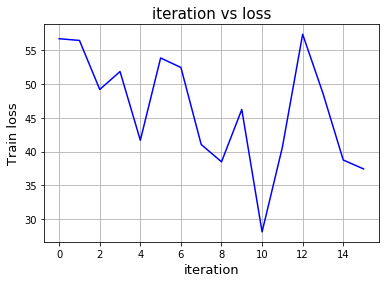

 95/200 [=============>................] - ETA: 567s - train loss: 46.1798 - dev loss: 52.0901

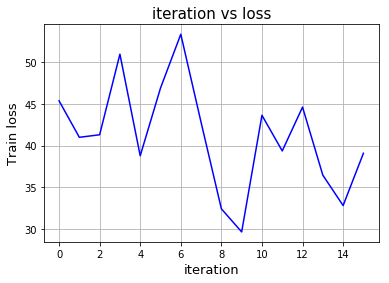

 96/200 [=============>................] - ETA: 563s - train loss: 41.1574 - dev loss: 50.3574

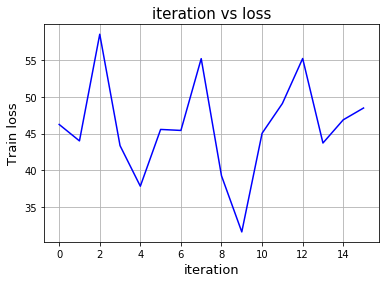

 97/200 [=============>................] - ETA: 558s - train loss: 45.9656 - dev loss: 45.2233

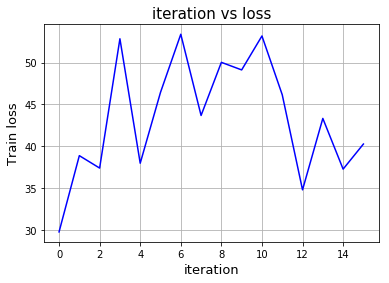

 98/200 [=============>................] - ETA: 552s - train loss: 43.4178 - dev loss: 50.8749

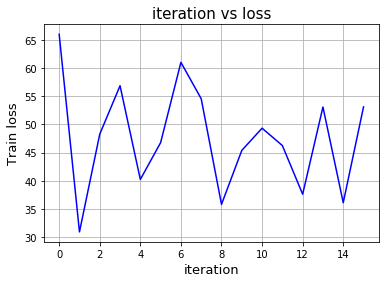

 99/200 [=============>................] - ETA: 547s - train loss: 47.5871 - dev loss: 51.0630

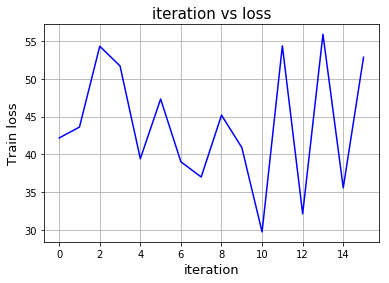

100/200 [==============>...............] - ETA: 541s - train loss: 43.8207 - dev loss: 54.5858

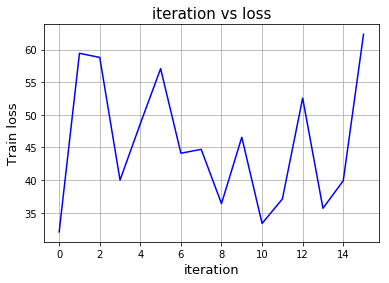

101/200 [==============>...............] - ETA: 536s - train loss: 45.5476 - dev loss: 50.5846

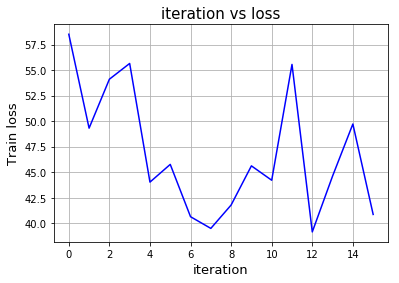

102/200 [==============>...............] - ETA: 530s - train loss: 46.8133 - dev loss: 49.6262

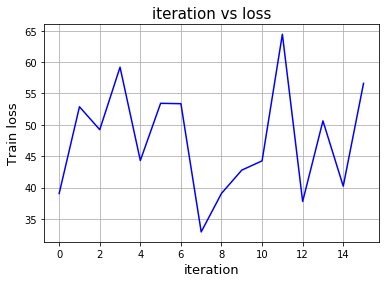

103/200 [==============>...............] - ETA: 525s - train loss: 47.5176 - dev loss: 55.8430

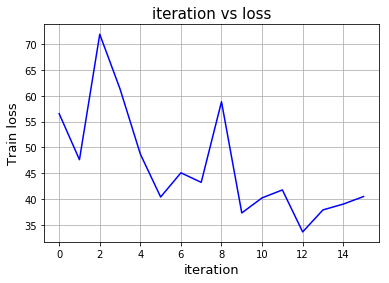

104/200 [==============>...............] - ETA: 519s - train loss: 46.4970 - dev loss: 49.4715

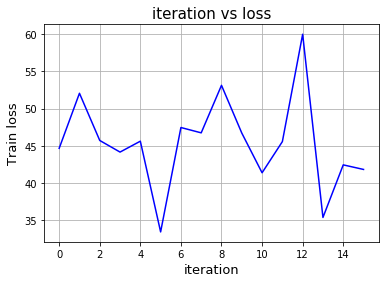

105/200 [==============>...............] - ETA: 514s - train loss: 45.4006 - dev loss: 47.9339

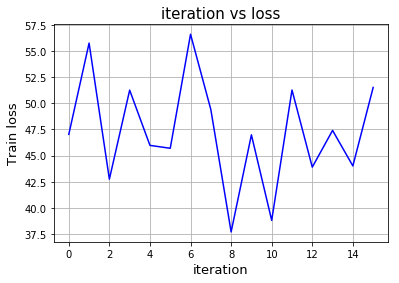

106/200 [==============>...............] - ETA: 508s - train loss: 47.2577 - dev loss: 40.9459

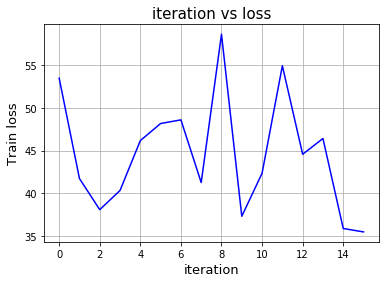

107/200 [===============>..............] - ETA: 503s - train loss: 44.5863 - dev loss: 52.3978

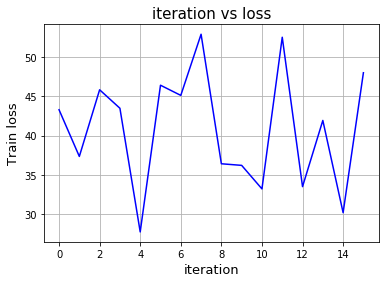

108/200 [===============>..............] - ETA: 497s - train loss: 40.8813 - dev loss: 48.0591

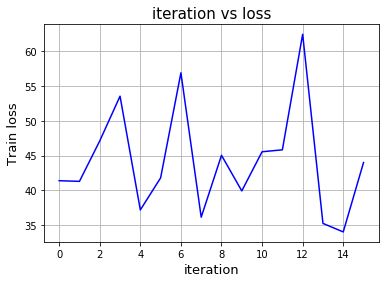

109/200 [===============>..............] - ETA: 492s - train loss: 44.2223 - dev loss: 57.9732

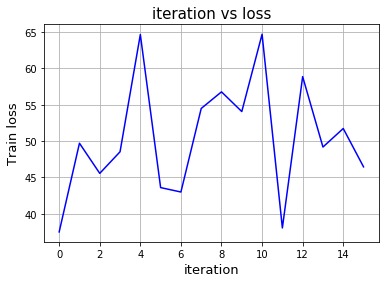

110/200 [===============>..............] - ETA: 486s - train loss: 50.4208 - dev loss: 48.4423

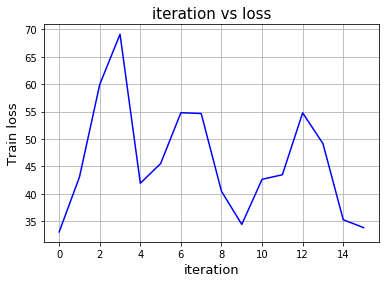

111/200 [===============>..............] - ETA: 481s - train loss: 46.0115 - dev loss: 53.6039

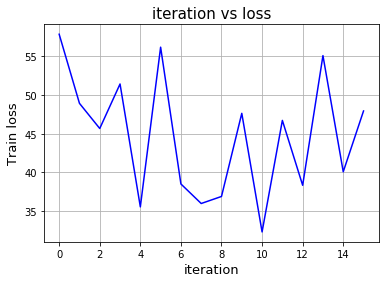

112/200 [===============>..............] - ETA: 475s - train loss: 44.6952 - dev loss: 43.0861

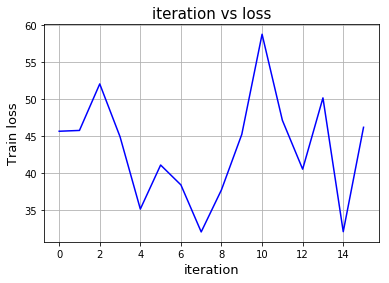

113/200 [===============>..............] - ETA: 470s - train loss: 43.3127 - dev loss: 42.2621

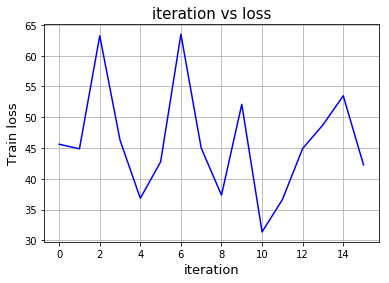

114/200 [================>.............] - ETA: 464s - train loss: 45.9260 - dev loss: 49.1409

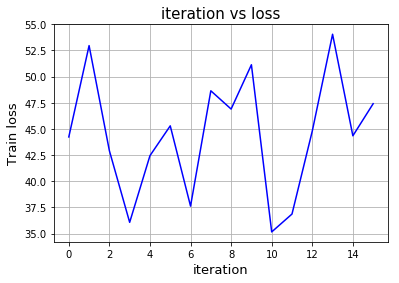

115/200 [================>.............] - ETA: 459s - train loss: 44.4288 - dev loss: 45.8744

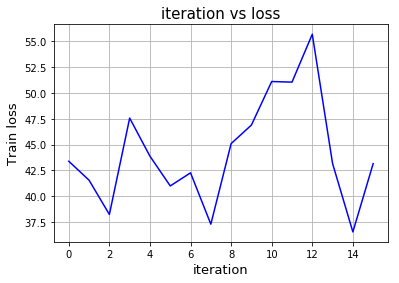

116/200 [================>.............] - ETA: 453s - train loss: 44.2385 - dev loss: 51.1261

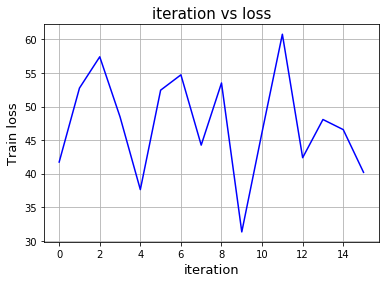

117/200 [================>.............] - ETA: 449s - train loss: 47.3972 - dev loss: 52.6553

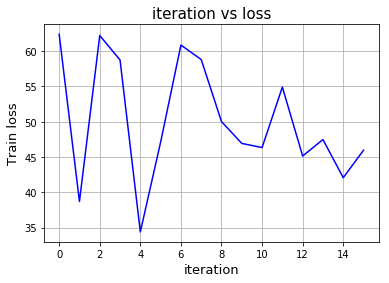

118/200 [================>.............] - ETA: 444s - train loss: 50.1267 - dev loss: 53.2218

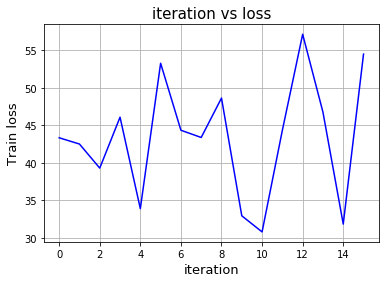

119/200 [================>.............] - ETA: 438s - train loss: 43.3062 - dev loss: 54.7016

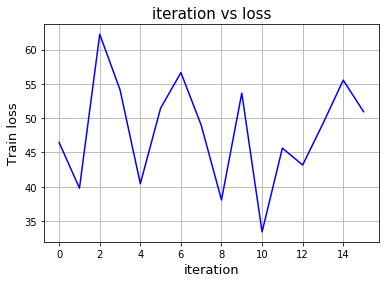

120/200 [=================>............] - ETA: 433s - train loss: 48.0987 - dev loss: 44.0548

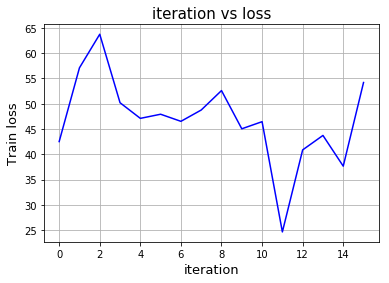

121/200 [=================>............] - ETA: 427s - train loss: 46.8184 - dev loss: 45.5269

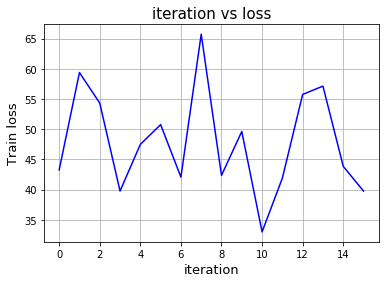

122/200 [=================>............] - ETA: 422s - train loss: 47.8786 - dev loss: 47.3664

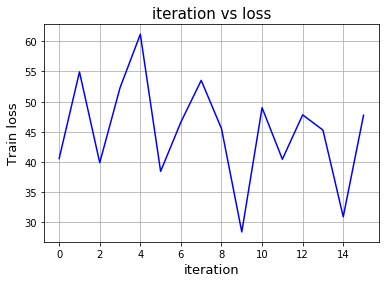

123/200 [=================>............] - ETA: 416s - train loss: 45.1710 - dev loss: 52.6828

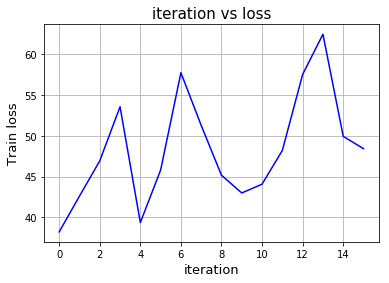

124/200 [=================>............] - ETA: 411s - train loss: 48.3821 - dev loss: 52.3447

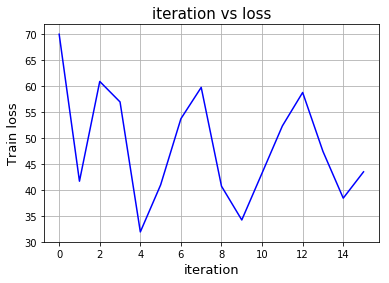

125/200 [=================>............] - ETA: 405s - train loss: 48.3824 - dev loss: 52.8515

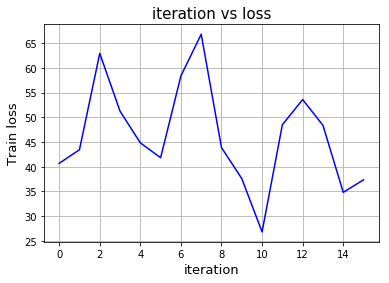

126/200 [=================>............] - ETA: 400s - train loss: 46.3178 - dev loss: 55.6359

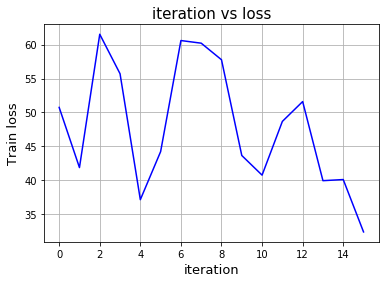

127/200 [==================>...........] - ETA: 395s - train loss: 47.9356 - dev loss: 51.9022

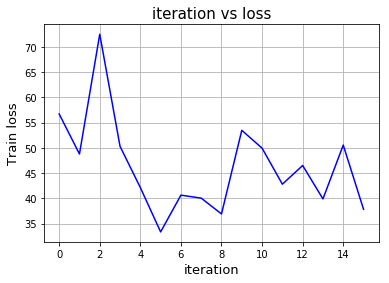

128/200 [==================>...........] - ETA: 389s - train loss: 46.3960 - dev loss: 48.5861

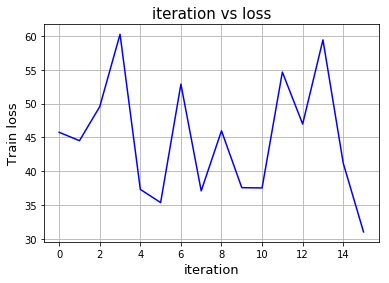

129/200 [==================>...........] - ETA: 384s - train loss: 44.8144 - dev loss: 45.5347

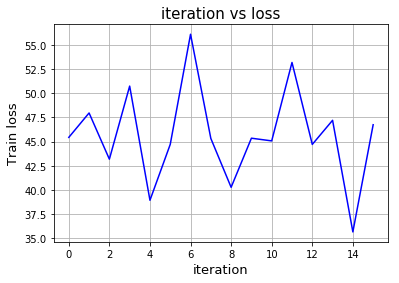

130/200 [==================>...........] - ETA: 378s - train loss: 45.6671 - dev loss: 52.1831

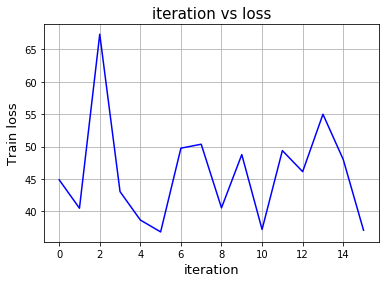

131/200 [==================>...........] - ETA: 373s - train loss: 45.8534 - dev loss: 50.9580

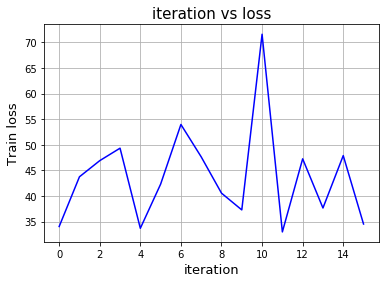

132/200 [==================>...........] - ETA: 367s - train loss: 43.8272 - dev loss: 50.2289

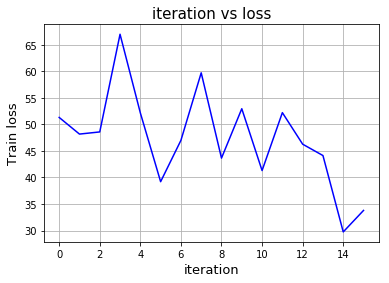

133/200 [==================>...........] - ETA: 362s - train loss: 47.3268 - dev loss: 43.5403

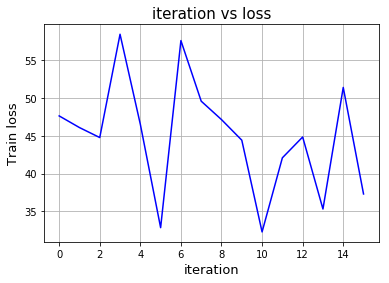

134/200 [===================>..........] - ETA: 356s - train loss: 44.8797 - dev loss: 59.9255

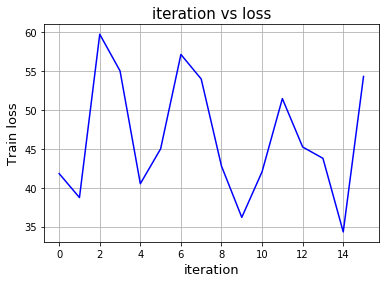

135/200 [===================>..........] - ETA: 351s - train loss: 46.3716 - dev loss: 52.0736

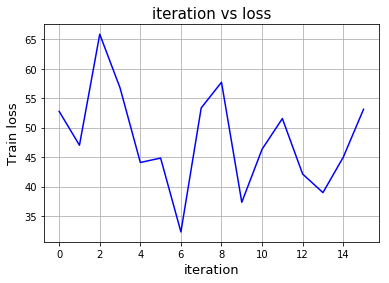

136/200 [===================>..........] - ETA: 345s - train loss: 48.0637 - dev loss: 51.9733

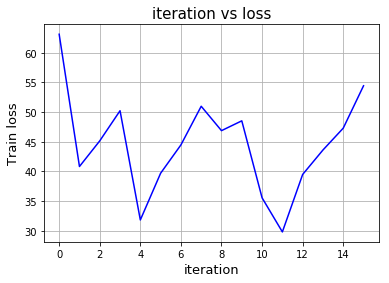

137/200 [===================>..........] - ETA: 340s - train loss: 44.4916 - dev loss: 47.5993

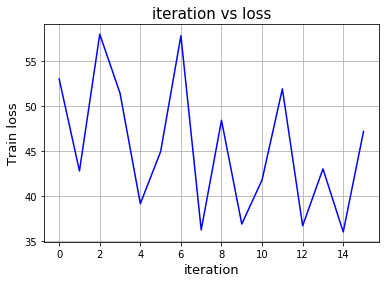

138/200 [===================>..........] - ETA: 335s - train loss: 45.3723 - dev loss: 52.4692

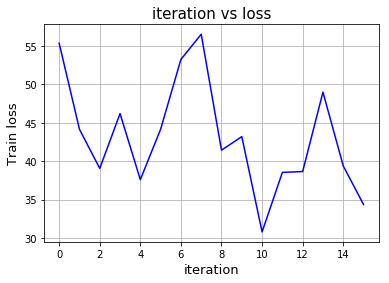

139/200 [===================>..........] - ETA: 330s - train loss: 43.2296 - dev loss: 50.6229

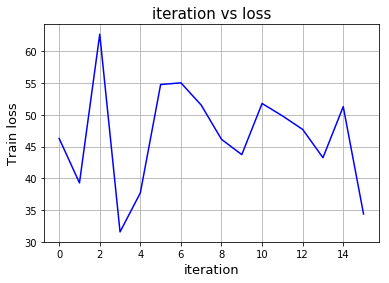

140/200 [====================>.........] - ETA: 324s - train loss: 46.6881 - dev loss: 49.8635

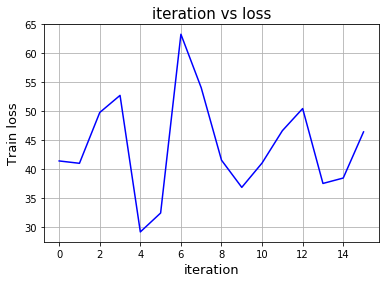

141/200 [====================>.........] - ETA: 319s - train loss: 43.9582 - dev loss: 47.4988

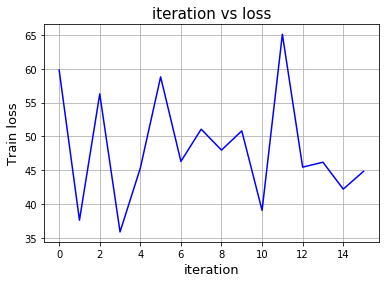

142/200 [====================>.........] - ETA: 314s - train loss: 48.2908 - dev loss: 46.2106

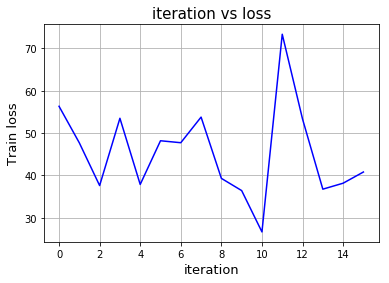

143/200 [====================>.........] - ETA: 308s - train loss: 45.4506 - dev loss: 44.5480

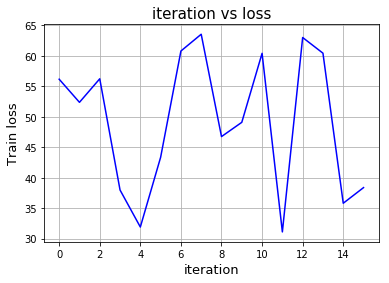

144/200 [====================>.........] - ETA: 303s - train loss: 49.2124 - dev loss: 40.6590

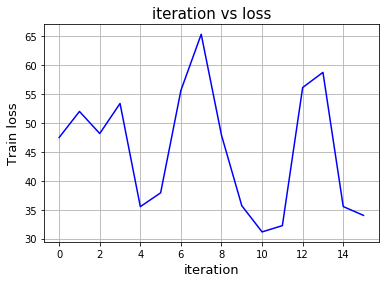

145/200 [====================>.........] - ETA: 297s - train loss: 45.4462 - dev loss: 45.0712

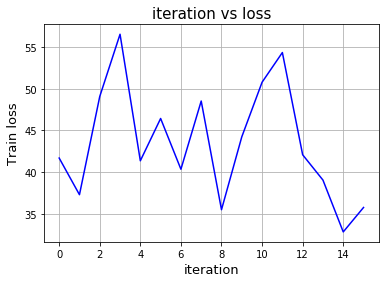

146/200 [====================>.........] - ETA: 292s - train loss: 43.4895 - dev loss: 53.4666

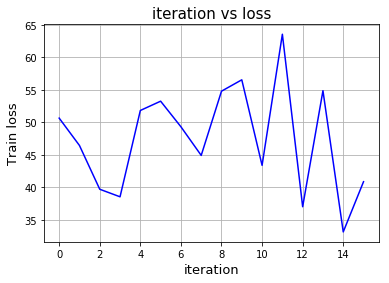

147/200 [=====================>........] - ETA: 286s - train loss: 47.4213 - dev loss: 49.8119

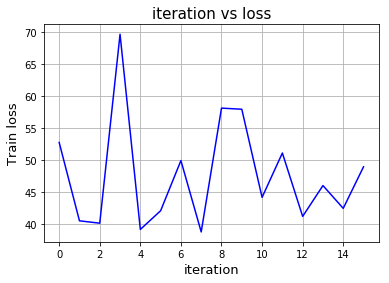

148/200 [=====================>........] - ETA: 281s - train loss: 47.6807 - dev loss: 50.7224

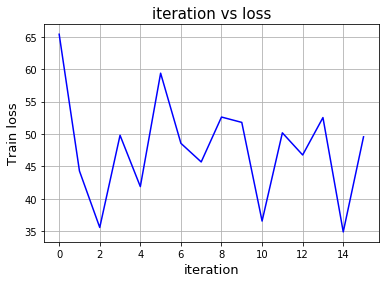

149/200 [=====================>........] - ETA: 275s - train loss: 47.8309 - dev loss: 47.9653

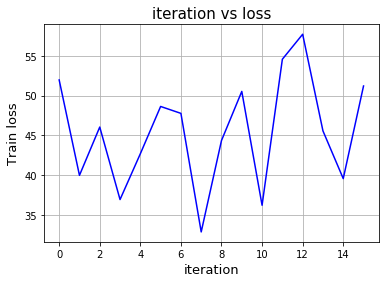

150/200 [=====================>........] - ETA: 270s - train loss: 45.4198 - dev loss: 47.2764

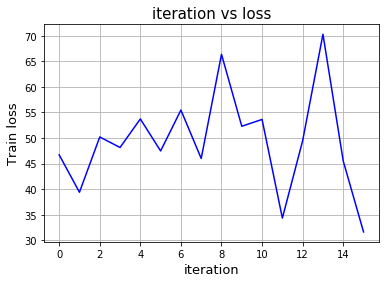

151/200 [=====================>........] - ETA: 265s - train loss: 49.4182 - dev loss: 50.4009

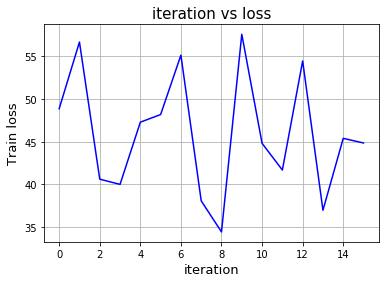

152/200 [=====================>........] - ETA: 259s - train loss: 45.9438 - dev loss: 54.6933

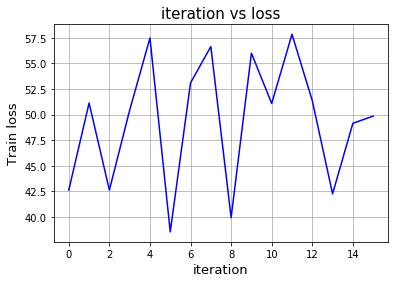

153/200 [=====================>........] - ETA: 254s - train loss: 49.3723 - dev loss: 47.4104

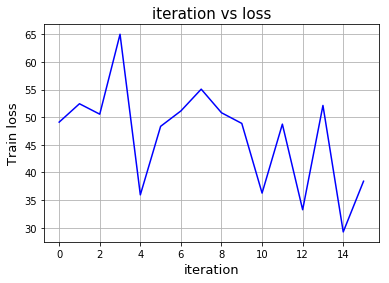

154/200 [======================>.......] - ETA: 248s - train loss: 46.5869 - dev loss: 47.8972

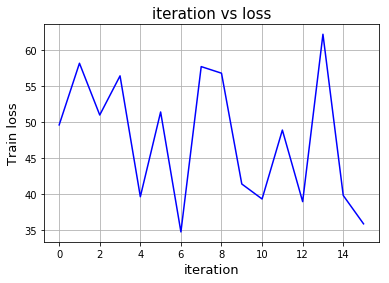

155/200 [======================>.......] - ETA: 243s - train loss: 47.6144 - dev loss: 46.8814

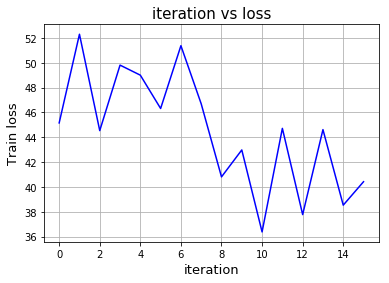

156/200 [======================>.......] - ETA: 237s - train loss: 44.4576 - dev loss: 42.2681

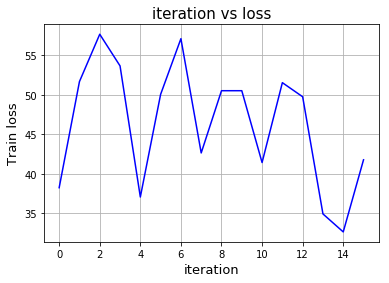

157/200 [======================>.......] - ETA: 232s - train loss: 46.3219 - dev loss: 56.1231

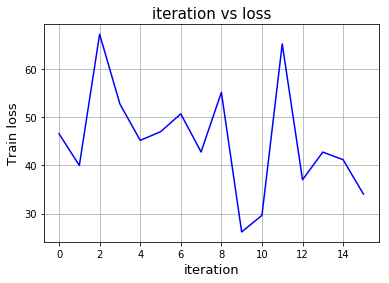

158/200 [======================>.......] - ETA: 227s - train loss: 45.1858 - dev loss: 52.1673

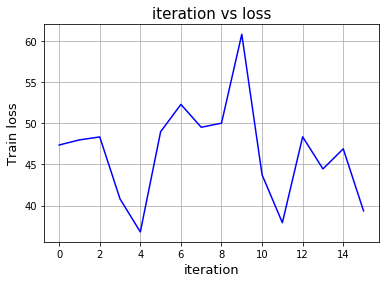

159/200 [======================>.......] - ETA: 222s - train loss: 46.4691 - dev loss: 51.2875

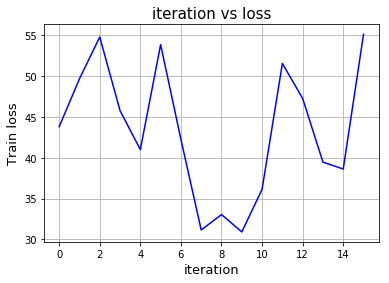

160/200 [=======================>......] - ETA: 216s - train loss: 43.4012 - dev loss: 53.0403

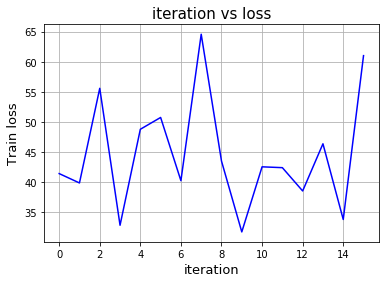

161/200 [=======================>......] - ETA: 211s - train loss: 44.6325 - dev loss: 46.9707

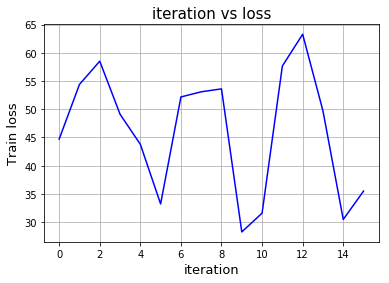

162/200 [=======================>......] - ETA: 205s - train loss: 46.1917 - dev loss: 45.1400

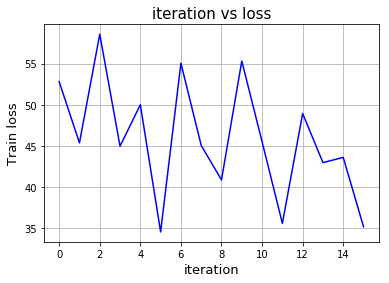

163/200 [=======================>......] - ETA: 200s - train loss: 45.8791 - dev loss: 49.9544

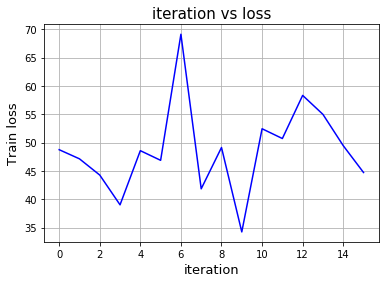

164/200 [=======================>......] - ETA: 194s - train loss: 48.7157 - dev loss: 47.8378

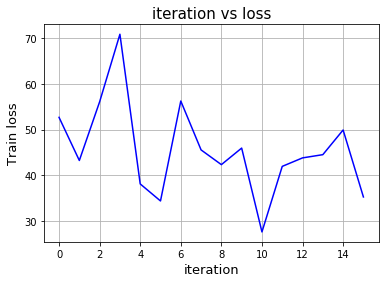

165/200 [=======================>......] - ETA: 189s - train loss: 45.5322 - dev loss: 45.2635

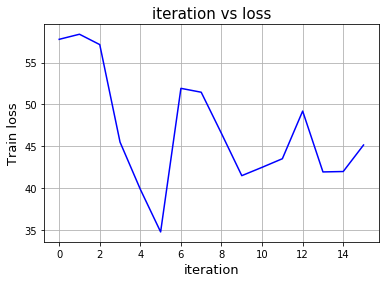

166/200 [=======================>......] - ETA: 184s - train loss: 46.8178 - dev loss: 53.6372

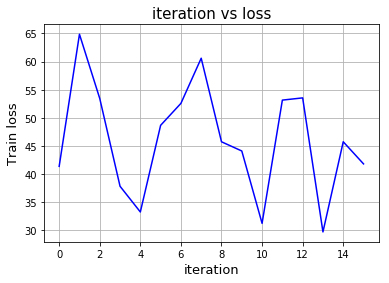

167/200 [========================>.....] - ETA: 178s - train loss: 46.1059 - dev loss: 45.9876

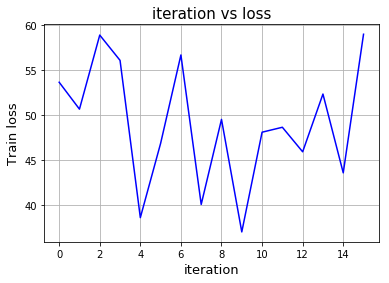

168/200 [========================>.....] - ETA: 173s - train loss: 49.0844 - dev loss: 51.9794

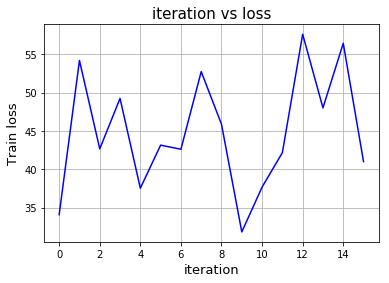

169/200 [========================>.....] - ETA: 167s - train loss: 44.7897 - dev loss: 49.7073

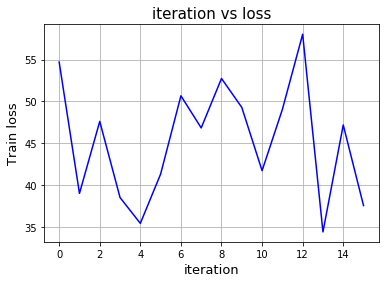

170/200 [========================>.....] - ETA: 162s - train loss: 45.2651 - dev loss: 52.7207

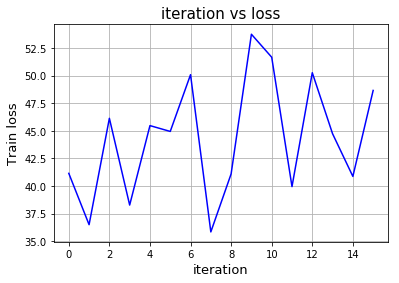

171/200 [========================>.....] - ETA: 156s - train loss: 44.3339 - dev loss: 54.0860

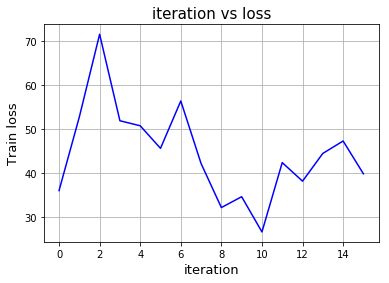

172/200 [========================>.....] - ETA: 151s - train loss: 44.4740 - dev loss: 46.4121

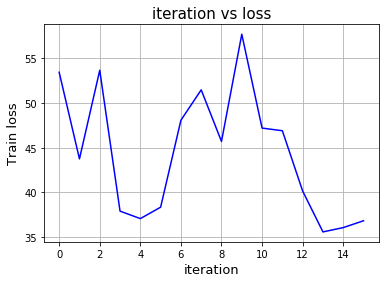

173/200 [========================>.....] - ETA: 146s - train loss: 44.3658 - dev loss: 54.9482

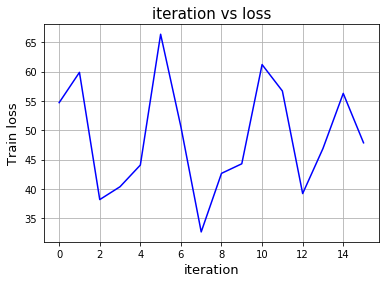

174/200 [=========================>....] - ETA: 140s - train loss: 48.8578 - dev loss: 52.3724

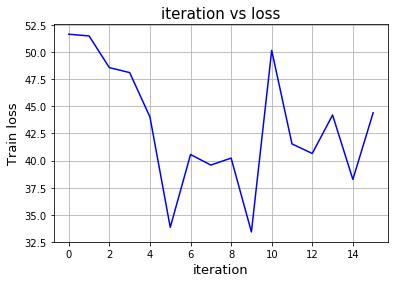

175/200 [=========================>....] - ETA: 135s - train loss: 43.1663 - dev loss: 52.6912

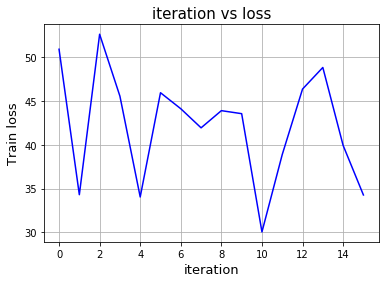

176/200 [=========================>....] - ETA: 129s - train loss: 42.2112 - dev loss: 48.7432

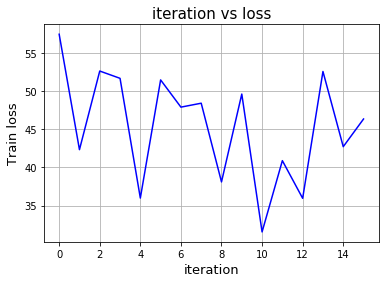

177/200 [=========================>....] - ETA: 124s - train loss: 45.3559 - dev loss: 53.3579

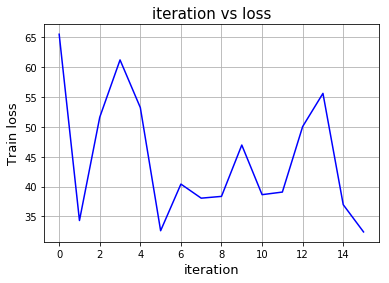

178/200 [=========================>....] - ETA: 118s - train loss: 44.6985 - dev loss: 49.8509

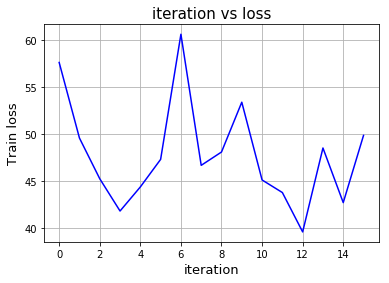

179/200 [=========================>....] - ETA: 113s - train loss: 47.7512 - dev loss: 43.5639

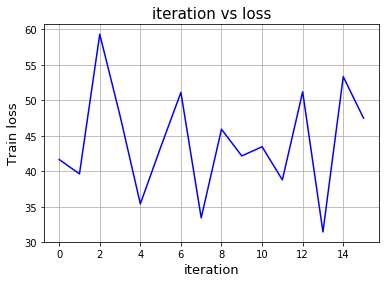

180/200 [==========================>...] - ETA: 108s - train loss: 44.1022 - dev loss: 50.8514

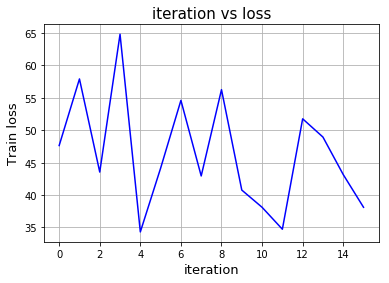

181/200 [==========================>...] - ETA: 102s - train loss: 46.3650 - dev loss: 52.4411

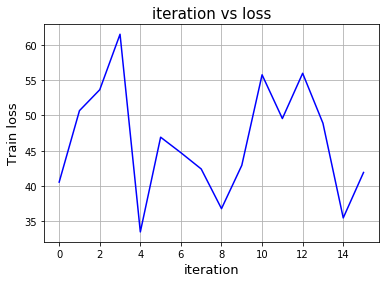

182/200 [==========================>...] - ETA: 97s - train loss: 46.3222 - dev loss: 39.1553 

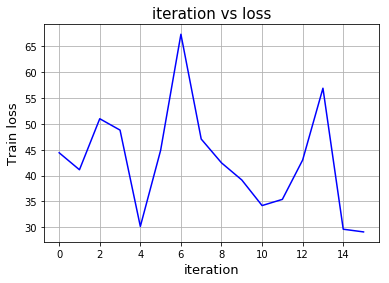

183/200 [==========================>...] - ETA: 92s - train loss: 42.7911 - dev loss: 45.5599

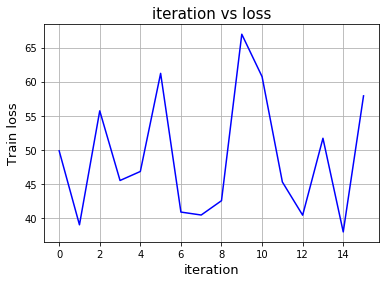

184/200 [==========================>...] - ETA: 86s - train loss: 48.9277 - dev loss: 44.1163

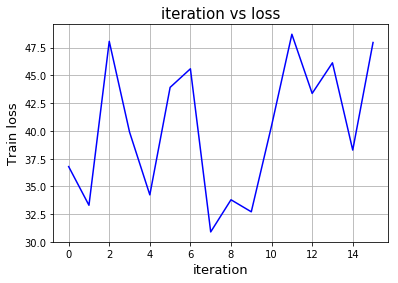

185/200 [==========================>...] - ETA: 81s - train loss: 40.2581 - dev loss: 51.9531

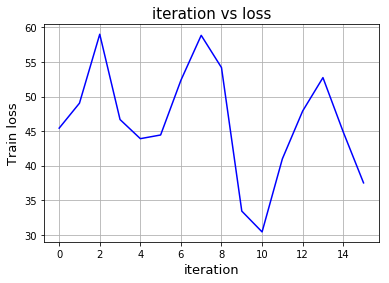

186/200 [==========================>...] - ETA: 75s - train loss: 46.3586 - dev loss: 52.3461

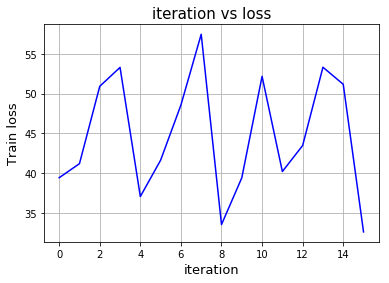

187/200 [===========================>..] - ETA: 70s - train loss: 44.7029 - dev loss: 48.1775

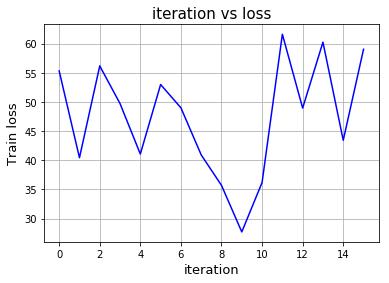

188/200 [===========================>..] - ETA: 64s - train loss: 47.3933 - dev loss: 50.7643

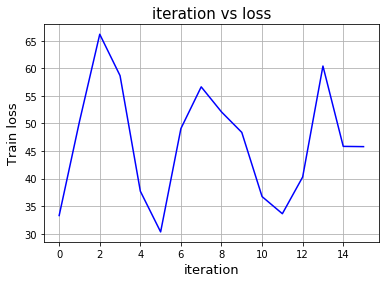

189/200 [===========================>..] - ETA: 59s - train loss: 46.5929 - dev loss: 52.5283

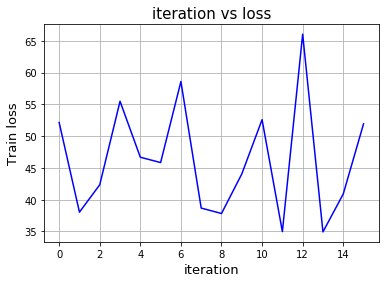

190/200 [===========================>..] - ETA: 54s - train loss: 46.3099 - dev loss: 49.3368

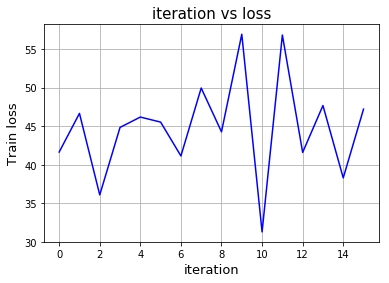

191/200 [===========================>..] - ETA: 48s - train loss: 44.7575 - dev loss: 48.7450

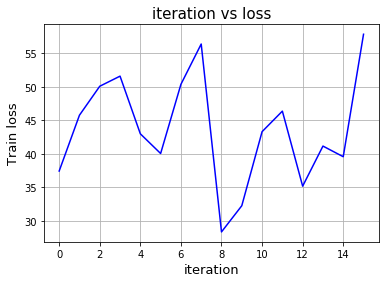

192/200 [===========================>..] - ETA: 43s - train loss: 43.6804 - dev loss: 52.8597

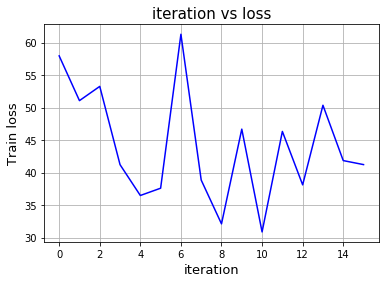

193/200 [===========================>..] - ETA: 37s - train loss: 44.0795 - dev loss: 45.1436

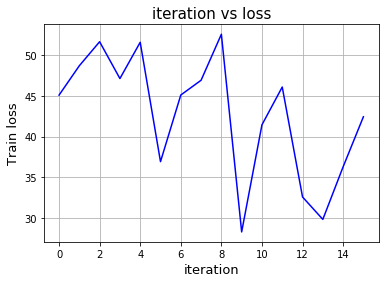

194/200 [============================>.] - ETA: 32s - train loss: 42.6643 - dev loss: 46.1249

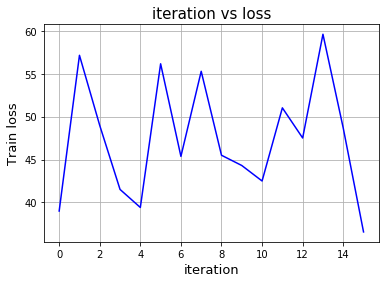

195/200 [============================>.] - ETA: 27s - train loss: 47.4083 - dev loss: 46.1020

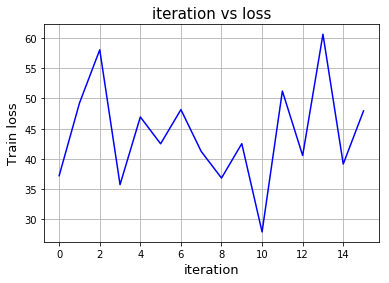

196/200 [============================>.] - ETA: 21s - train loss: 44.1235 - dev loss: 48.8656

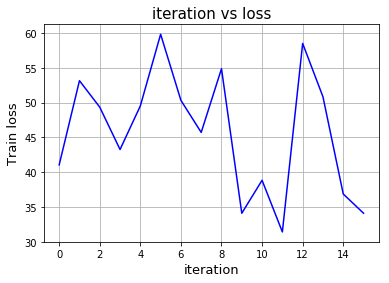

197/200 [============================>.] - ETA: 16s - train loss: 45.7291 - dev loss: 50.3090

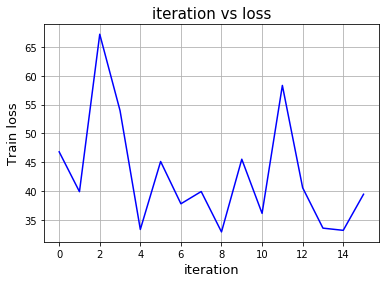

198/200 [============================>.] - ETA: 10s - train loss: 42.7558 - dev loss: 47.1947

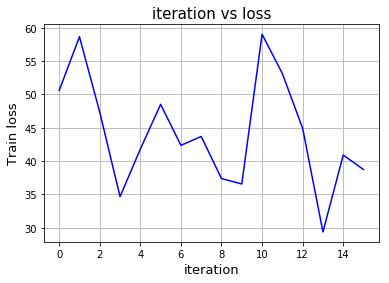

199/200 [============================>.] - ETA: 5s - train loss: 44.2274 - dev loss: 41.3323 

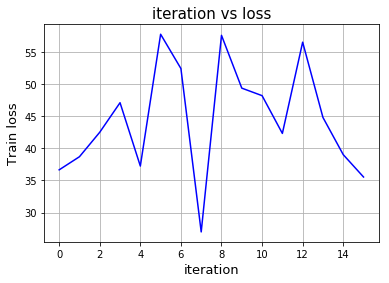

200/200 [==============================] - 1081s - train loss: 44.5223 - dev loss: 47.0555  


In [6]:
# run training mode
with get_session() as sess:
    sess.run(tf.global_variables_initializer())
    val_loss, tr_loss, tr_pred, val_pred \
            = model.train(sess, (input_frames_train, captions_train), verbose = True)

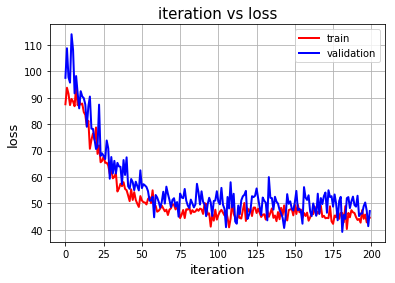

In [7]:
# plot learning curve
plt.plot(range(len(tr_loss)), tr_loss, 'r-', linewidth = 2, label = 'train')
plt.plot(range(len(val_loss)), val_loss, 'b-', linewidth = 2, label = 'validation')
plt.grid()
plt.xlabel('iteration', fontsize = 13)
plt.ylabel('loss', fontsize = 13)
plt.title('iteration vs loss', fontsize = 15)
plt.legend()
plt.savefig(os.getcwd() + '/output/caption_learning_curve.png')

In [9]:
# check one caption
batch_size = 5
idx = np.random.randint(batch_size)
sample = tr_pred[idx]
words = []
embed_train = False # whether train embedding word
print('sample: ', sample)
# caption
for i in sample:
    word = index2Word[i]
    words.append(word)
# # nearest neighbor searching
# for i in range(20):
#     best_error = float('inf')
#     word_vec = sample[i]
#     print('Word vec :', word_vec.shape)
#     if embed_train:
#         for row in range(embeddings.shape[0]):
#             vec = embeddings[row]
#             word = index2Word[row]
#             if np.sum(vec) == 0: continue
#             error = np.sum(np.square(word_vec - vec))
#             if error < best_error:
#                 w = word
#                 best_error = error
#     else:
#         for word, vec in word_dict.items():
#             if len(vec) == 0: continue
#             error = np.sum(np.square(word_vec - vec))
#             if error < best_error:
#                 w = word
#                 best_error = error
#     words.append(w)
    
print('Test Caption: ', ' '.join(w for w in words))

sample:  [265 265 270 270 270 270 270 270 270 270 270 270 270 270 270 270 270 270
 270 270]
Test Caption:  <START> <START> a a a a a a a a a a a a a a a a a a


In [11]:
len(sample)

20

In [15]:
for batch in minibatches(input_frames_train, captions_train, 50, 20):
    inp, cap = batch
    print('Captions: ', cap)
    raise

Captions:  [[   265.    270.  22428.   5190.    908.    270.  12062.  18103.    266.
     266.    266.    266.    266.    266.    266.    266.    266.    266.
     266.    266.]
 [   265.    270.  12062.  10561.   9553.   9695.   5190.  22215.  13945.
   19689.   9539.    266.    266.    266.    266.    266.    266.    266.
     266.    266.]
 [   265.  12062.   9617.    270.   9602.  19219.    266.    266.    266.
     266.    266.    266.    266.    266.    266.    266.    266.    266.
     266.    266.]
 [   265.    270.  22648.  11019.  10561.  11936.  13778.  20275.   3214.
     266.    266.    266.    266.    266.    266.    266.    266.    266.
     266.    266.]
 [   265.  12062.  13821.  19131.  16522.   1602.    266.    266.    266.
     266.    266.    266.    266.    266.    266.    266.    266.    266.
     266.    266.]
 [   265.    270.  12062.  10855.    908.  20678.  20275.  21414.  18003.
   13695.    270.   1562.    266.    266.    266.    266.    266.    266.
     2

RuntimeError: No active exception to reraise